In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors  import KNeighborsClassifier 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [1]:
import numpy as np
import pandas as pd
filename="diabetes_unclean.csv"
filepath="C:/Users/MY PC/Documents/workspace/"
df=pd.read_csv(filepath+filename)
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         1009 non-null   int64  
 1   No_Pation  1009 non-null   int64  
 2   Gender     1009 non-null   object 
 3   AGE        1008 non-null   float64
 4   Urea       1008 non-null   float64
 5   Cr         1007 non-null   float64
 6   HbA1c      1006 non-null   float64
 7   Chol       1007 non-null   float64
 8   TG         1007 non-null   float64
 9   HDL        1008 non-null   float64
 10  LDL        1007 non-null   float64
 11  VLDL       1008 non-null   float64
 12  BMI        1009 non-null   float64
 13  CLASS      1009 non-null   object 
dtypes: float64(10), int64(2), object(2)
memory usage: 110.5+ KB


In [147]:
df1=df.copy()
df1.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [148]:
df1.describe()

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1009.000000,1.009000e+03,1008.000000,1008.000000,1007.000000,1006.000000,1007.000000,1007.000000,1008.000000,1007.000000,1008.000000,1009.000000
mean,339.161546,2.717448e+05,53.620040,5.131094,68.973188,8.284155,4.863873,2.348769,1.204216,2.610119,1.850595,29.589911
std,239.738169,3.365681e+06,8.740975,2.931136,59.813297,2.533576,1.297326,1.397487,0.658158,1.116095,3.649859,4.946246
min,1.000000,1.230000e+02,25.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,127.000000,2.406500e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,296.000000,3.439900e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,548.000000,4.539000e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


In [149]:
df1.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          1
Urea         1
Cr           2
HbA1c        3
Chol         2
TG           2
HDL          1
LDL          2
VLDL         1
BMI          0
CLASS        0
dtype: int64

In [150]:
df1.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

In [151]:
df1['Gender'].unique()

array(['F', 'M', 'f'], dtype=object)

In [152]:
df1['Gender'].replace('f','F', inplace=True)

In [153]:
df1['Gender'].value_counts()

M    570
F    439
Name: Gender, dtype: int64

In [154]:
df1['CLASS'].unique()

array(['N', 'N ', 'P', 'Y', 'Y '], dtype=object)

In [155]:
df1['CLASS'].replace('N ','N', inplace=True)
df1['CLASS'].replace('Y ','Y', inplace=True)

In [156]:
z=df1[df1['CLASS']=='P']
df1['CLASS'].unique()

array(['N', 'P', 'Y'], dtype=object)

In [157]:
cleandf1=pd.concat([df1[df1['CLASS']=='N'],df1[df1['CLASS']=='Y']])
cleandf1

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,NaN,62.0,6.8,5.3,2.0,1.0,3.5,0.9,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,NaN,5.7,4.0,0.9,3.3,1.8,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.7,5.3,2.0,1.0,3.5,NaN,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.3,5.3,3.3,1.0,1.4,1.3,29.0,Y


In [158]:
cleandf1.CLASS.unique()

array(['N', 'Y'], dtype=object)

# filling of missing values NaN

In [159]:
cleandf1.interpolate(Method='linear',limit_direction='Forward',inplace=True)

In [160]:
cleandf1

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50.0,4.7,46.0,4.90,4.2,0.9,2.4,1.4,0.50,24.0,N
1,735,34221,M,26.0,4.5,62.0,4.90,3.7,1.4,1.1,2.1,0.60,23.0,N
2,420,47975,F,50.0,4.7,46.0,4.90,4.2,0.9,2.4,1.4,0.50,24.0,N
3,680,87656,F,50.0,4.7,46.0,4.90,4.2,0.9,2.4,1.4,0.50,24.0,N
4,504,34223,M,33.0,7.1,46.0,4.90,4.9,1.0,0.8,2.0,0.40,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,M,55.0,4.4,62.0,6.80,5.3,2.0,1.0,3.5,0.90,30.1,Y
1005,192,454316,M,55.0,4.8,88.0,6.75,5.7,4.0,0.9,3.3,1.80,30.0,Y
1006,193,454316,M,62.0,6.3,82.0,6.70,5.3,2.0,1.0,3.5,1.55,30.1,Y
1007,194,454316,F,57.0,4.1,70.0,9.30,5.3,3.3,1.0,1.4,1.30,29.0,Y


In [161]:
cleandf1.isnull().sum()

ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

In [162]:
#converting catergorical to numerical
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cleandf1['Gender']=le.fit_transform(cleandf1['Gender'])
cleandf1['CLASS']=le.fit_transform(cleandf1['CLASS'])
cleandf1

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,0,50.0,4.7,46.0,4.90,4.2,0.9,2.4,1.4,0.50,24.0,0
1,735,34221,1,26.0,4.5,62.0,4.90,3.7,1.4,1.1,2.1,0.60,23.0,0
2,420,47975,0,50.0,4.7,46.0,4.90,4.2,0.9,2.4,1.4,0.50,24.0,0
3,680,87656,0,50.0,4.7,46.0,4.90,4.2,0.9,2.4,1.4,0.50,24.0,0
4,504,34223,1,33.0,7.1,46.0,4.90,4.9,1.0,0.8,2.0,0.40,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,191,454316,1,55.0,4.4,62.0,6.80,5.3,2.0,1.0,3.5,0.90,30.1,1
1005,192,454316,1,55.0,4.8,88.0,6.75,5.7,4.0,0.9,3.3,1.80,30.0,1
1006,193,454316,1,62.0,6.3,82.0,6.70,5.3,2.0,1.0,3.5,1.55,30.1,1
1007,194,454316,0,57.0,4.1,70.0,9.30,5.3,3.3,1.0,1.4,1.30,29.0,1


# Data Modelling

In [219]:
# spliti data features into x and y

x=cleandf1.drop(['CLASS'],axis=1).values
x


array([[5.020e+02, 1.798e+04, 0.000e+00, ..., 1.400e+00, 5.000e-01,
        2.400e+01],
       [7.350e+02, 3.422e+04, 1.000e+00, ..., 2.100e+00, 6.000e-01,
        2.300e+01],
       [4.200e+02, 4.798e+04, 0.000e+00, ..., 1.400e+00, 5.000e-01,
        2.400e+01],
       ...,
       [1.930e+02, 4.543e+05, 1.000e+00, ..., 3.500e+00, 1.550e+00,
        3.010e+01],
       [1.940e+02, 4.543e+05, 0.000e+00, ..., 1.400e+00, 1.300e+00,
        2.900e+01],
       [1.950e+02, 4.543e+03, 0.000e+00, ..., 3.100e+00, 7.000e-01,
        3.300e+01]])

In [220]:
y=cleandf1['CLASS'].values
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Model evaluation without Standardization

In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True) #random_state=seed,shuffle=True)
model=LogisticRegression()# child knows nothing
model.fit(x_train,y_train)
score=model.score(x_test,y_test)
#y_pred=score.predict(x_test )
print(score)

0.8815331010452961


# Train_Test_Split Data

In [250]:
# splitting dta in train test split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True) 

#Scale the dta a using Standard scaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

#perform Logistic model on the scaled datatset
model=LogisticRegression()
model.fit(x_train_scaled,y_train)
test_score=model.score(x_test_scaled,y_test)
print("The Accuracy Score: {}".format(test_score))
y_pred=model.predict(x_test)
print(y_pred)

The Accuracy Score: 0.9790940766550522
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# Evaluating Clasification Model Using Pipeline

In [241]:
#Pipeline
log_pipeline=Pipeline(steps=[('scaler',StandardScaler()),
      ('log_reg',LogisticRegression())])

knn_pipeline=Pipeline(steps=[('scaler',StandardScaler()),
      ('KNN',KNeighborsClassifier())])

pipeline=[log_pipeline, knn_pipeline]

pipe_dict={0:'Logistic Regression',1:'KNN'}

# split features into train and test set
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3,random_state=42,shuffle=True) #random_state=seed,shuffle=True)

for pipe in pipeline:
    pipe.fit(x_train,y_train) 
for i, model in enumerate(pipeline):
    print('{} test accuracy: {}'. format(pipe_dict[i], model.score(x_test,y_test)))

Logistic Regression test accuracy: 0.9790940766550522
KNN test accuracy: 0.9721254355400697


# Confusion Metrics

In [247]:
#confusion metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
con_mat=confusion_matrix(y_test,y_pred)
print(con_mat)
print(classification_report(y_test,y_pred))

[[ 34   0]
 [251   2]]
              precision    recall  f1-score   support

           0       0.12      1.00      0.21        34
           1       1.00      0.01      0.02       253

    accuracy                           0.13       287
   macro avg       0.56      0.50      0.11       287
weighted avg       0.90      0.13      0.04       287



[[ 34   0]
 [251   2]]


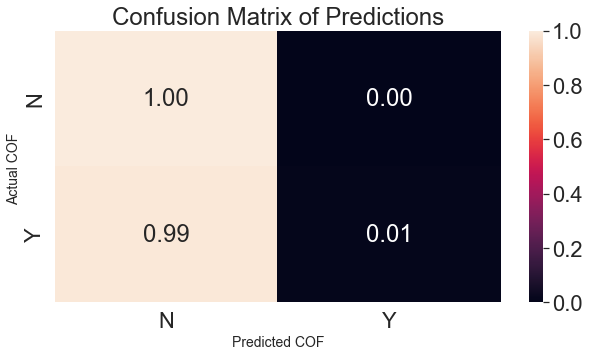

In [248]:
#Confusion Matrix
con_mat=confusion_matrix(y_test,y_pred)
print(con_mat)
cm = con_mat
#cm = confusion_matrix(y_test, y_pred)
# Normalise
labls =['N','Y']
sns.set(font_scale = 2)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=labls, yticklabels=labls)
plt.ylabel('Actual COF ', size = 14)
plt.xlabel('Predicted COF', size = 14)
plt.title('Confusion Matrix of Predictions', size = 24)
#plt.figure(figsize = (16,5))
plt.show(block=False)

# ROC CURVE

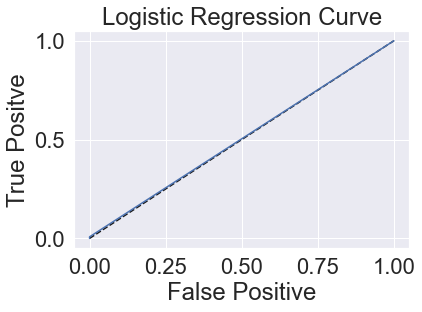

In [249]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive')
plt.ylabel('True Positve')
plt.title('Logistic Regression Curve')
plt.show()

In [ ]:
# # predict crops using each features
# from sklearn.metrics import f1_score
# from sklearn.linear_model import LogisticRegression
# import pandas as pd
# import numpy as np  # Import numpy

# x=crops[["N", "P", "K", "ph"]]
# features_dict = {}
# for feature in ["N", "P", "K", "ph"]:  # Assuming x is now a DataFrame
#     X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=42)
#     log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
#     log_reg.fit(X_train[[feature]], y_train)  # Use only the current feature for training
#     # make prediction on the test dataset
#     y_pred = log_reg.predict(X_test[[feature]])
    
#     # calculating the F1 score
#     f1 = f1_score(y_test, y_pred, average='weighted')
#     features_dict[feature] = f1
#     print(f'F1 Score for {feature}: {f1}')

In [ ]:
# best_predictive_feature={'F1 Score': features_dict }
# best_predictive_feature=pd.DataFrame(best_predictive_feature).reset_index()
# best_predictive_feature.columns=['Variables','F1 Score']
# print(f" F1 Score of the best_predictive_feature is {round(best_predictive_feature['F1 Score'].max(),3)}.")